# ImageNet Dog Races Classification

In [130]:
# TensorFlow ≥2.0 is required for this notebook
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# check if GPU is available as this notebook will be very slow without GPU
if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")

No GPU was detected. CNNs can be very slow without a GPU.


In [132]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Input, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GaussianNoise
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

!pip install --upgrade deeplearning2020
from deeplearning2020 import helpers

# jupyters magic command
%matplotlib inline

Requirement already up-to-date: deeplearning2020 in c:\users\marvi\.conda\envs\deeplearning2020\lib\site-packages (0.4.21)


### Loading Dataset

In [133]:
train_data, test_data, classes = ImageWoof.load_data()

C:\Users\marvi\.keras\datasets\imagewoof2-320\train
Loaded 9025 images
C:\Users\marvi\.keras\datasets\imagewoof2-320\val
Loaded 3929 images


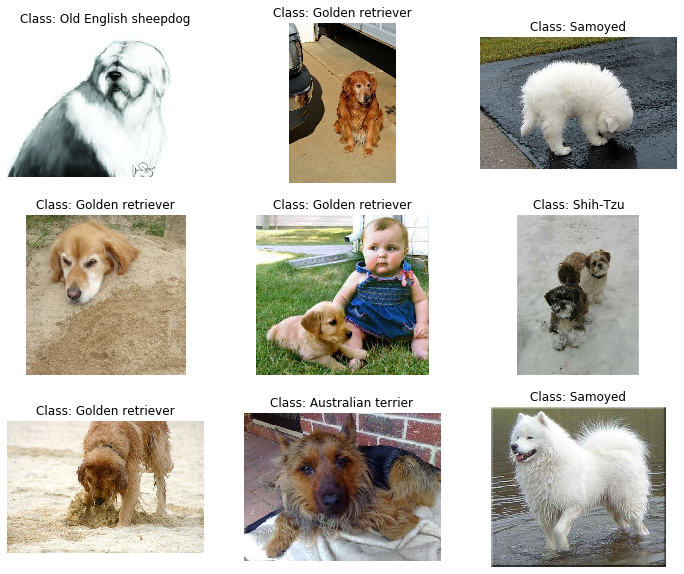

In [134]:
helpers.plot_images(train_data.take(9), classes)

### Preprocessing

In [135]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [300, 300])
    return resized_image, label

In [140]:
batch_size = 32
n_classes = classes.shape[0]
train_data_preprocessed = train_data.shuffle(1000) 

test_data_preprocessed = test_data.map(preprocess).batch(batch_size).prefetch(1)
train_data_preprocessed = train_data_preprocessed.map(preprocess).batch(batch_size).prefetch(1)

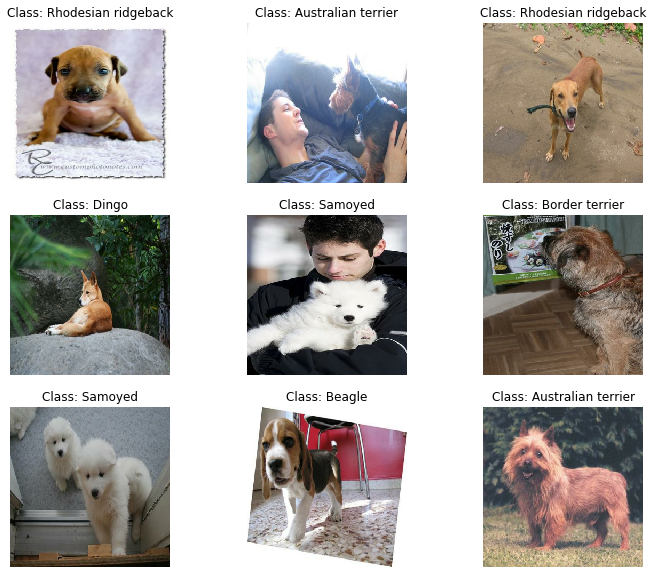

In [141]:
helpers.plot_images(train_data_preprocessed.unbatch().take(9), classes)

In [143]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dropout, Flatten, GlobalAveragePooling2D

base_model = Xception(weights='imagenet', include_top=False)

model = GlobalAveragePooling2D()(base_model.output)
model = Dropout(0.5)(model)

classifier = Dense(1000, activation='softmax')
classifier = Dropout(0.5)

output_layer = Dense(n_classes, activation='softmax')(model)

model = Model(base_model.input, output_layer)

model.summary()

bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, None, None, 7 536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, None, None, 7 2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, None, None, 7 0           block5_sepconv2_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv3 (SeparableConv2 (None, None, None, 7 536536      block5_sepconv3_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv3_bn (BatchNormal (None, None, None, 7 2912        block5_sepconv3[0][0]     

### Training

In [144]:
for layer in base_model.layers:
  layer.trainable = False

In [145]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_data_preprocessed,
    epochs=5,
    validation_data=test_data_preprocessed
)

Train for 283 steps, validate for 123 steps
Epoch 1/5
 12/283 [>.............................] - ETA: 1:28:25 - loss: 0.8092 - accuracy: 0.7415

KeyboardInterrupt: 

## Auswertung

In [121]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'], 'o-')
plt.plot(history.history['val_acc'], 'o-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['acc'][-1], xy=(1, history.history['acc'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_acc'][-1], xy=(1, history.history['val_acc'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['acc'][-1] - history.history['val_acc'][-1]) + " diff", xy=(1, (history.history['acc'][-1] + history.history['val_acc'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

# heavy overfitting

NameError: name 'history' is not defined

In [122]:
# Plot training & validation loss values
plt.plot(history.history['loss'], 'o-')
plt.plot(history.history['val_loss'], 'o-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['loss'][-1], xy=(1, history.history['loss'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_loss'][-1], xy=(1, history.history['val_loss'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['loss'][-1] - history.history['val_loss'][-1]) + " diff", xy=(1, (history.history['loss'][-1] + history.history['val_loss'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

NameError: name 'history' is not defined

In [123]:
# Plot diff between training and validation for accuracy and loss
diff_acc = np.asarray(history.history['acc']) - np.asarray(history.history['val_acc'])
diff_loss = np.asarray(history.history['loss']) - np.asarray(history.history['val_loss'])
plt.plot(diff_acc, 'o-')
plt.plot(diff_loss, 'o-')
plt.title('Diffs')
plt.ylabel('Diffs')
plt.xlabel('Epoch')
plt.legend(['Acc', 'Loss'], loc='upper left')
plt.annotate('%0.4f' % diff_acc[-1], xy=(1, diff_acc[-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % diff_loss[-1], xy=(1, diff_loss[-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

NameError: name 'history' is not defined

In [124]:
# Plot training & validation mse values
plt.plot(history.history['mse'], 'o-')
plt.plot(history.history['val_mse'], 'o-')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['mse'][-1], xy=(1, history.history['mse'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_mse'][-1], xy=(1, history.history['val_mse'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['mse'][-1] - history.history['val_mse'][-1]) + " diff", xy=(1, (history.history['mse'][-1] + history.history['val_mse'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

NameError: name 'history' is not defined

In [125]:
# Plot training & validation mae values
plt.plot(history.history['mae'], 'o-')
plt.plot(history.history['val_mae'], 'o-')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['mae'][-1], xy=(1, history.history['mae'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_mae'][-1], xy=(1, history.history['val_mae'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['mae'][-1] - history.history['val_mae'][-1]) + " diff", xy=(1, (history.history['mae'][-1] + history.history['val_mae'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

NameError: name 'history' is not defined

In [126]:
# Plot training & validation mape values
plt.plot(history.history['mape'], 'o-')
plt.plot(history.history['val_mape'], 'o-')
plt.title('Model MAPE')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.annotate('%0.4f' % history.history['mape'][-1], xy=(1, history.history['mape'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % history.history['val_mape'][-1], xy=(1, history.history['val_mape'][-1]), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.annotate('%0.4f' % (history.history['mape'][-1] - history.history['val_mape'][-1]) + " diff", xy=(1, (history.history['mape'][-1] + history.history['val_mape'][-1])/2), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.show()

NameError: name 'history' is not defined

In [127]:
helpers.plot_predictions(model, test_images[:20], labels=test_vec_labels[:20])

NameError: name 'model' is not defined

In [128]:
from deeplearning2020 import Submission
Submission('aa1d44a8dfe7971e2d524e5898d40ab8', '2', model).submit()

NameError: name 'model' is not defined